***Start recording***
***End recording***
***Start writing output***
***End writing output***


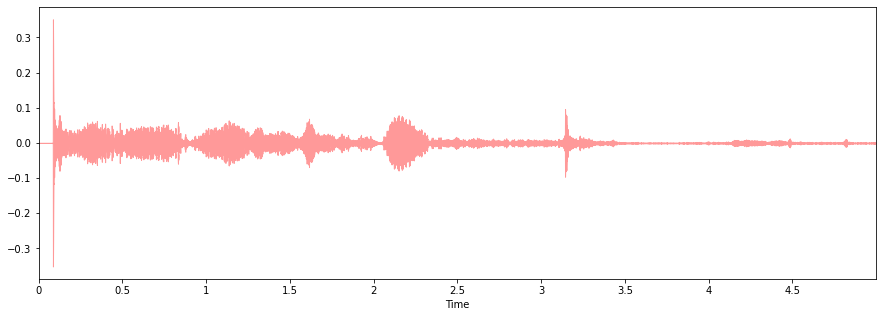

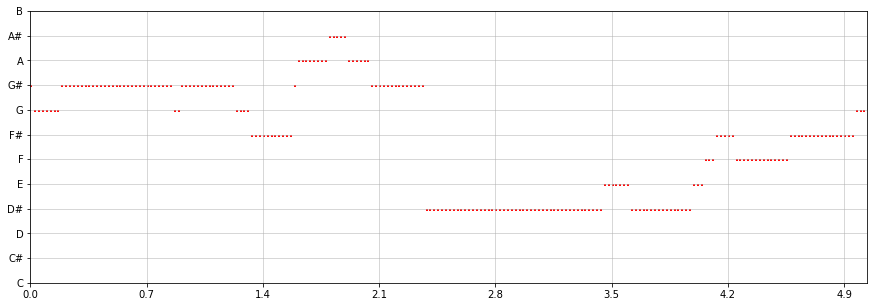

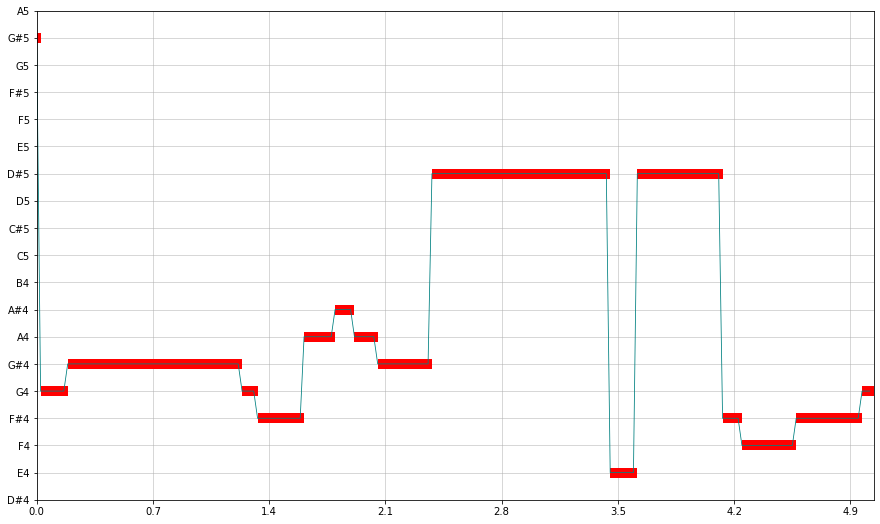

In [1]:
import numpy as np
import IPython.display as ipd
import pandas as pd
import singya_util
import os
import IPython


singya = singya_util.Singya()
singya.record_song()
singya.load_song()
singya.draw_wave()
singya.draw_scatter()
singya.draw_hlines()

In [8]:

# TOTO: play the detected notes


In [32]:
# Draw guitar sheet
from PIL import Image, ImageFont, ImageDraw

emptySheet = Image.open("./emptySheet.png")

print(emptySheet.format, emptySheet.size, emptySheet.mode)

draw = ImageDraw.Draw(emptySheet)

fontsize = 15  # starting font size
level = 8
text = str(level)
font = ImageFont.truetype("arial.ttf", fontsize)
font.getsize("8")
draw.rectangle((100, 50, 110, 60), fill='white')
draw.text((100, 50), "8", fill="blue", font=font)

# emptySheet.show()
emptySheet.save("test.png")

PNG (855, 125) RGBA
